<a href="https://colab.research.google.com/github/Pimchanok6430205105/Project1/blob/main/Project1_66PTJL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="300">

## Due Date: Sunday, October 1, 2023
<br>
<span style="color:red">NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!</span>

## List team members:

1. นางสาวทิพย์วัลย์ สุโพธิ์     643020062-6 thippawan.s@kkumail.com
2. นางสาวพิมชนก วงศ์สายเชื้อ 643020510-5 pimchanok.w@kkumail.com
3. นางสาววิภาดา ห่วงสูงเนิน  643020520-2    wipada.h@kkumail.com
4. นางสาววริศรา ปันลา      643020519-7 waritsara.pa@kkumail.com

**NOTE1**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost

**NOTE2**: Create a slide presentation once finished, convert to pdf format, and turn in by one group member only
<br>A list of documents to turn in: 1) Jupyter notebook containing results and 2) A set of slides in pdf format

In [1]:
# Load these libraries
import json
import pprint
import pandas as pd
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

from google.colab import drive # เชื่อมบัญชีกับ google drive
drive.mount('/content/drive') # เช็คว่าเชื่อมติดหรือไม่

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Problem 1: Working with Twitter Data and JSON file

We are working with a Twitter dataset in JSON format from `thailand_tweets.txt`.<br>
The tweets were scraped using "Thailand" keyword on August 31, 2022.<br>
We are going to examine the dataset and retrieve information from the JSON file.
Most Twitter datasets provide only Tweet ID where we can retrieve tweets from tweet ID as follow.
```
twitter.com/anyuser/status/<tweet_id>
```

In [3]:
# Read the file and remove BOM
with open('/content/drive/MyDrive/Data warehouse/thailand_tweets.txt', 'r', encoding='utf-8-sig') as json_file:
    json_data = json.load(json_file)


#### Read JSON file

In [4]:
# read the file
with open('/content/drive/MyDrive/Data warehouse/thailand_tweets.txt','r') as json_file:
  json_data = json.load(json_file)

In [5]:
# inspect the file
json_data

'{"1564764893038882816": {"tweet_id": "1564764893038882816", "username": "matthunter", "name": "MATT HUNT\\u039eR", "profile_picture": "https://twitter.com/matthunter/photo", "replies": 2, "retweets": 1, "likes": 7, "is_retweet": false, "posted_time": "2022-08-30T23:59:57+00:00", "content": "Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ", "hashtags": [], "mentions": [], "images": [], "videos": [], "tweet_url": "https://twitter.com/matthunter/status/1564764893038882816", "link": ""}, "1564764866598080513": {"tweet_id": "1564764866598080513", "username": "DavSmithVP", "name": "DavSmith / Virtual Photography", "profile_picture": "https://twitter.com/DavSmithVP/photo", "replies": 0, "retweets": 0, "likes": 2, "is_retweet": false, "posted_time": "2022-08-30T23:59:50+00:00", "content": "Tomb Raider Underworld | Thailand \\n#VirtualPhotography \\n@tombraider\\n @crystaldynamics", "hashtags": ["VirtualPhotography"], "mentions": ["tombraider"

#### Pretty print json/dict object

Possible approaches:
* In fact, `pandas` has `pandas.read_json(<file_dir>)` function to read json file into dataframe
* As we create a data dict, we can also read our data dict into a pandas dataframe

In [6]:
tweet_data = pd.read_json("{\"1564764893038882816\": {\"tweet_id\": \"1564764893038882816\", \"username\": \"matthunter\", \"name\": \"MATT HUNT\\u039eR\", \"profile_picture\": \"https://twitter.com/matthunter/photo\", \"replies\": 2, \"retweets\": 1, \"likes\": 7, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:59:57+00:00\", \"content\": \"Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. \", \"hashtags\": [], \"mentions\": [], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/matthunter/status/1564764893038882816\", \"link\": \"\"}, \"1564764866598080513\": {\"tweet_id\": \"1564764866598080513\", \"username\": \"DavSmithVP\", \"name\": \"DavSmith / Virtual Photography\", \"profile_picture\": \"https://twitter.com/DavSmithVP/photo\", \"replies\": 0, \"retweets\": 0, \"likes\": 2, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:59:50+00:00\", \"content\": \"Tomb Raider Underworld | Thailand \\n#VirtualPhotography \\n@tombraider\\n @crystaldynamics\", \"hashtags\": [\"VirtualPhotography\"], \"mentions\": [\"tombraider\", \"crystaldynamics\"], \"images\": [\"https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?format=jpg&name=small\"], \"videos\": [], \"tweet_url\": \"https://twitter.com/DavSmithVP/status/1564764866598080513\", \"link\": \"\"}, \"1564764845685280772\": {\"tweet_id\": \"1564764845685280772\", \"username\": \"DailyPattaya\", \"name\": \"The Pattaya Daily\", \"profile_picture\": \"https://twitter.com/DailyPattaya/photo\", \"replies\": 0, \"retweets\": 0, \"likes\": 0, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:59:45+00:00\", \"content\": \"The latest The Pattaya Daily! http://thepattayadaily.com Thanks to \\n@PopeKael\\n @ASEANNOWTH\\n #thailand #pattaya\", \"hashtags\": [\"thailand\", \"pattaya\"], \"mentions\": [\"PopeKael\", \"ASEANNOWTH\"], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/DailyPattaya/status/1564764845685280772\", \"link\": \"\"}, \"1564764710804897792\": {\"tweet_id\": \"1564764710804897792\", \"username\": \"Bryan62766077\", \"name\": \"Bryan\", \"profile_picture\": \"https://twitter.com/Bryan62766077/photo\", \"replies\": 1, \"retweets\": 0, \"likes\": 1, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:59:13+00:00\", \"content\": \"You can live some places for next to nothing, believe it or not. I pay $300 a month for a really nice apartment in Thailand. All utilities included. No deposit. Close to the beach. Live music clubs everywhere. Meals are about $2\", \"hashtags\": [], \"mentions\": [], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/Bryan62766077/status/1564764710804897792\", \"link\": \"\"}, \"1564764468277612549\": {\"tweet_id\": \"1564764468277612549\", \"username\": \"Megan_and_Grrr\", \"name\": \"Megan\", \"profile_picture\": \"https://twitter.com/Megan_and_Grrr/photo\", \"replies\": 0, \"retweets\": 0, \"likes\": 0, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:58:15+00:00\", \"content\": \"ALIEN HOUSE is a story of love, hope and alien intervention set in Wales, Thailand and Inner Space. It's a #fantasy story about #extraterrestrial contact and the conflict between a man and his inner voice or alter ego. William is not sure if he's going mad https://smarturl.it/alien-house-eng?IQid=jbmegan\\u2026\", \"hashtags\": [\"fantasy\", \"extraterrestrial\"], \"mentions\": [], \"images\": [\"https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?format=jpg&name=small\"], \"videos\": [], \"tweet_url\": \"https://twitter.com/Megan_and_Grrr/status/1564764468277612549\", \"link\": \"\"}, \"1564764445825458181\": {\"tweet_id\": \"1564764445825458181\", \"username\": \"OhmPawatInter\", \"name\": \"OhmPawat International\", \"profile_picture\": \"https://twitter.com/OhmPawatInter/photo\", \"replies\": 0, \"retweets\": 99, \"likes\": 143, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:58:10+00:00\", \"content\": \"Trend twitter update \\n\\nTop Twitter influencers in Thailand today \\n#4 \\n@ohmpawatt\\nInfluence Score: 19442\\n7 top tweets\\n25182 retweets\\n\\nhttps://etrenders.com/trendsetters/Thailand\\u2026\\n#ohmpawat #\\u0e22\\u0e34\\u0e49\\u0e215\\u0e1e\\u0e31\\u0e19\\u0e02\\u0e2d\\u0e07\\u0e42\\u0e2d\\u0e21\\u0e20\\u0e27\\u0e31\\u0e15\", \"hashtags\": [\"4\", \"ohmpawat\", \"\\u0e22\"], \"mentions\": [\"ohmpawatt\"], \"images\": [\"https://pbs.twimg.com/media/Fbco99jWIAEd3Oe?format=jpg&name=small\", \"https://pbs.twimg.com/media/Fbco-JwWYAE7oLy?format=jpg&name=small\"], \"videos\": [], \"tweet_url\": \"https://twitter.com/OhmPawatInter/status/1564764445825458181\", \"link\": \"\"}, \"1564764361742110720\": {\"tweet_id\": \"1564764361742110720\", \"username\": \"nato_tonyo11\", \"name\": \"nutri(BUSY SI ENGR.)| SoliD\", \"profile_picture\": \"https://twitter.com/nato_tonyo11/photo\", \"replies\": 0, \"retweets\": 2, \"likes\": 18, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:57:50+00:00\", \"content\": \"Good morning  world! And goodmorning to you too #DonnyPangilinan, enjoy Thailand babe and please do take selfies out there!, pagod nakong makikitang sapatos pa din nasa igs mo!!\", \"hashtags\": [\"DonnyPangilinan\"], \"mentions\": [], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/nato_tonyo11/status/1564764361742110720\", \"link\": \"\"}, \"1564764274098323456\": {\"tweet_id\": \"1564764274098323456\", \"username\": \"ThThitikarn61\", \"name\": \"thiti\", \"profile_picture\": \"https://twitter.com/ThThitikarn61/photo\", \"replies\": 0, \"retweets\": 0, \"likes\": 0, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:57:29+00:00\", \"content\": \"Listening to #faraway the title track of #theotherside album by #MarkTuan \\n@marktuan\\n while traveling to Thailand\", \"hashtags\": [\"faraway\", \"theotherside\", \"MarkTuan\"], \"mentions\": [\"marktuan\"], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/ThThitikarn61/status/1564764274098323456\", \"link\": \"\"}, \"1564764028014313472\": {\"tweet_id\": \"1564764028014313472\", \"username\": \"Livetradingnews\", \"name\": \"Knightly News\", \"profile_picture\": \"https://twitter.com/Livetradingnews/photo\", \"replies\": 0, \"retweets\": 2, \"likes\": 3, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:56:30+00:00\", \"content\": \"With the recent news of the SCB X-Bitkub deal falling apart and the Zipmex incident, investors in Thailand's digital currency market are facing a negative outlook\", \"hashtags\": [], \"mentions\": [], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/Livetradingnews/status/1564764028014313472\", \"link\": \"\"}, \"1564763907700531202\": {\"tweet_id\": \"1564763907700531202\", \"username\": \"DiscoverSoc\", \"name\": \"Discover Society\", \"profile_picture\": \"https://twitter.com/DiscoverSoc/photo\", \"replies\": 0, \"retweets\": 1, \"likes\": 0, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:56:02+00:00\", \"content\": \"#ICYMI  On the Frontline. Crude Power in Thailand\\u2019s 2014 Coup: Old Soldiers Almost Die\", \"hashtags\": [\"ICYMI\"], \"mentions\": [], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/DiscoverSoc/status/1564763907700531202\", \"link\": \"https://t.co/OYQzv4BSm9\"}, \"1564763775403712513\": {\"tweet_id\": \"1564763775403712513\", \"username\": \"Onside10900651\", \"name\": \"Onside\", \"profile_picture\": \"https://twitter.com/Onside10900651/photo\", \"replies\": 0, \"retweets\": 0, \"likes\": 0, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:55:30+00:00\", \"content\": \"And I thought Thailand was absolutely democratic?\", \"hashtags\": [], \"mentions\": [], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/Onside10900651/status/1564763775403712513\", \"link\": \"\"}, \"1564763746463105026\": {\"tweet_id\": \"1564763746463105026\", \"username\": \"lekwilliams\", \"name\": \"Lek\", \"profile_picture\": \"https://twitter.com/lekwilliams/photo\", \"replies\": 0, \"retweets\": 0, \"likes\": 0, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:55:23+00:00\", \"content\": \"How far would you go to save the family farm and keep your siblings in school? Read what Lek did in 'Behind The Smile, the story of Lek, a bar girl in Pattaya' by Owen Jones! https://smarturl.it/BTS-boxset?IQid=SJB-lw-thailand\\u2026 #pattaya #Thailand Please retweet\", \"hashtags\": [\"pattaya\", \"Thailand\"], \"mentions\": [], \"images\": [\"https://pbs.twimg.com/media/FbcoVHpWIAEh_R0?format=jpg&name=small\"], \"videos\": [], \"tweet_url\": \"https://twitter.com/lekwilliams/status/1564763746463105026\", \"link\": \"\"}, \"1564763729967054848\": {\"tweet_id\": \"1564763729967054848\", \"username\": \"o_rung_o1\", \"name\": \"o_Rung_o\", \"profile_picture\": \"https://twitter.com/o_rung_o1/photo\", \"replies\": 0, \"retweets\": 28, \"likes\": 15, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:55:19+00:00\", \"content\": \"\\u0e27\\u0e31\\u0e19\\u0e19\\u0e35\\u0e49\\u0e27\\u0e31\\u0e19\\u0e2a\\u0e38\\u0e14\\u0e17\\u0e49\\u0e32\\u0e22\\u0e02\\u0e2d\\u0e07\\u0e01\\u0e32\\u0e23\\u0e42\\u0e2b\\u0e27\\u0e15 \\u0e23\\u0e32\\u0e07\\u0e27\\u0e31\\u0e25 Outstanding Asian Star Thailand #SDA2022 \\u0e43\\u0e2b\\u0e49\\u0e19\\u0e49\\u0e2d\\u0e07\\u0e1e\\u0e35\\u0e1e\\u0e35\\u0e41\\u0e25\\u0e49\\u0e27\\u0e19\\u0e30\\u0e04\\u0e30 \\n\\u0e21\\u0e32\\u0e1e\\u0e32\\u0e19\\u0e49\\u0e2d\\u0e07\\u0e44\\u0e1b\\u0e23\\u0e31\\u0e1a\\u0e16\\u0e49\\u0e27\\u0e22\\u0e23\\u0e32\\u0e07\\u0e27\\u0e31\\u0e252\\u0e1b\\u0e35\\u0e0b\\u0e49\\u0e2d\\u0e19\\u0e01\\u0e31\\u0e19\\u0e04\\u0e48\\u0e30\\n#voteforppkritt \\n#ppkritt\", \"hashtags\": [\"SDA2022\", \"voteforppkritt\", \"ppkritt\"], \"mentions\": [], \"images\": [\"https://pbs.twimg.com/media/FbcoUQAaQAAIFME?format=jpg&name=small\"], \"videos\": [], \"tweet_url\": \"https://twitter.com/o_rung_o1/status/1564763729967054848\", \"link\": \"\"}, \"1564763679232405504\": {\"tweet_id\": \"1564763679232405504\", \"username\": \"sixhav\", \"name\": \"shi bangs\", \"profile_picture\": \"https://twitter.com/sixhav/photo\", \"replies\": 1, \"retweets\": 0, \"likes\": 1, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:55:07+00:00\", \"content\": \"right? 2 years ago he is just a simple born and raised guy from thailand who can barely speak thai and likes to do diys and make everything about math i just love how authentic he is hahaha have you seen his 1000 push ups one? \", \"hashtags\": [], \"mentions\": [], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/sixhav/status/1564763679232405504\", \"link\": \"\"}, \"1564763673662464003\": {\"tweet_id\": \"1564763673662464003\", \"username\": \"JaeJazee\", \"name\": \"\\u24b7\\u24c9\\u24c8ARMY\\ud560\\uba38\\ub2c8\\u1d36\\u1d39\\u1d36\\u1d37\\u00b3\\u1d36\", \"profile_picture\": \"https://twitter.com/JaeJazee/photo\", \"replies\": 0, \"retweets\": 0, \"likes\": 0, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:55:06+00:00\", \"content\": \"I knew I heard the beginning speech that Lisa had an Australian accent.  It is not that she is from Australia but Thailand... here is the explanation...\", \"hashtags\": [], \"mentions\": [], \"images\": [\"https://pbs.twimg.com/media/FbcoKGTWAAAA0-D?format=png&name=900x900\"], \"videos\": [], \"tweet_url\": \"https://twitter.com/JaeJazee/status/1564763673662464003\", \"link\": \"\"}, \"1564763553130655744\": {\"tweet_id\": \"1564763553130655744\", \"username\": \"chak4793\", \"name\": \"\\u00a2\\u043d\\u03b1\\u043a.\\u0454\\u0442\\u043d\", \"profile_picture\": \"https://twitter.com/chak4793/photo\", \"replies\": 1, \"retweets\": 0, \"likes\": 7, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:54:37+00:00\", \"content\": \"Can fluf merch send to Asian countries like Japan or Thailand?\", \"hashtags\": [], \"mentions\": [], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/chak4793/status/1564763553130655744\", \"link\": \"\"}, \"1564763407818952705\": {\"tweet_id\": \"1564763407818952705\", \"username\": \"SarahJa56317435\", \"name\": \"j\", \"profile_picture\": \"https://twitter.com/SarahJa56317435/photo\", \"replies\": 0, \"retweets\": 0, \"likes\": 0, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:54:02+00:00\", \"content\": \"= and the French people and also Thailand's people that have not thrown lethal military barracks gas at an 'Enemy of Thought' are the races to not survive a space race Masterclass\", \"hashtags\": [], \"mentions\": [], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/SarahJa56317435/status/1564763407818952705\", \"link\": \"\"}, \"1564763389058027521\": {\"tweet_id\": \"1564763389058027521\", \"username\": \"starrykws\", \"name\": \"em \\u263e\", \"profile_picture\": \"https://twitter.com/starrykws/photo\", \"replies\": 0, \"retweets\": 0, \"likes\": 0, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:53:58+00:00\", \"content\": \"woo.ddadda in thailand \", \"hashtags\": [], \"mentions\": [], \"images\": [\"https://pbs.twimg.com/media/FbcoAO_XkAA-Isn?format=jpg&name=360x360\", \"https://pbs.twimg.com/media/FbcoAPDXEAYc26T?format=jpg&name=360x360\"], \"videos\": [], \"tweet_url\": \"https://twitter.com/starrykws/status/1564763389058027521\", \"link\": \"\"}, \"1564763303989366784\": {\"tweet_id\": \"1564763303989366784\", \"username\": \"aisseutea\", \"name\": \"Cynthia Dewi\", \"profile_picture\": \"https://twitter.com/aisseutea/photo\", \"replies\": 1, \"retweets\": 0, \"likes\": 0, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:53:38+00:00\", \"content\": \"Kalo di thailand bukan dong :)\", \"hashtags\": [], \"mentions\": [], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/aisseutea/status/1564763303989366784\", \"link\": \"\"}, \"1564763292354355200\": {\"tweet_id\": \"1564763292354355200\", \"username\": \"LDN327\", \"name\": \"LDN327\", \"profile_picture\": \"https://twitter.com/LDN327/photo\", \"replies\": 1, \"retweets\": 7, \"likes\": 5, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:53:35+00:00\", \"content\": \"- please engage\\n\\nELLE Thailand  \\n https://instagram.com/p/Ch02SH7hGpq/ \\n  https://instagram.com/p/Ch0xESZB1kr/ \\n\\n#LISA #LALISA #Money\", \"hashtags\": [\"LISA\", \"LALISA\", \"Money\"], \"mentions\": [], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/LDN327/status/1564763292354355200\", \"link\": \"https://t.co/6aZ539h9RK\"}, \"1564763185244426240\": {\"tweet_id\": \"1564763185244426240\", \"username\": \"Jay_beebee\", \"name\": \"Jay Bee\", \"profile_picture\": \"https://twitter.com/Jay_beebee/photo\", \"replies\": 1, \"retweets\": 7, \"likes\": 7, \"is_retweet\": true, \"posted_time\": \"2022-08-30T23:53:09+00:00\", \"content\": \"\\u0e1e\\u0e23\\u0e49\\u0e2d\\u0e21\\u0e04\\u0e23\\u0e31\\u0e0a\\n\\nPlease,come to thailand.\\n \\n\\n#JAYB #\\uc81c\\uc774\\ube44 \\n@jaybnow_hr\\n#GOT7 #\\uac13\\uc138\\ube10 \\n@GOT7\\n#CDNZA \\n@cdnzarecords\\n#Def\", \"hashtags\": [\"JAYB\", \"\\uc81c\\uc774\\ube44\", \"GOT7\", \"\\uac13\\uc138\\ube10\", \"CDNZA\", \"Def\"], \"mentions\": [\"jaybnow_hr\", \"GOT7\", \"cdnzarecords\"], \"images\": [\"https://pbs.twimg.com/media/FbcmB6RUEAA75m6?format=jpg&name=small\"], \"videos\": [], \"tweet_url\": \"https://twitter.com/Jay_beebee/status/1564763185244426240\", \"link\": \"\"}, \"1564763141589897217\": {\"tweet_id\": \"1564763141589897217\", \"username\": \"Iovelydoll\", \"name\": \"\", \"profile_picture\": \"https://twitter.com/Iovelydoll/photo\", \"replies\": 0, \"retweets\": 0, \"likes\": 3, \"is_retweet\": true, \"posted_time\": \"2022-08-30T23:52:59+00:00\", \"content\": \"we need more ten vlogs in thailand...a girl can dream\", \"hashtags\": [], \"mentions\": [], \"images\": [\"https://pbs.twimg.com/media/EDNptiHUEAAqdwm?format=jpg&name=small\"], \"videos\": [], \"tweet_url\": \"https://twitter.com/Iovelydoll/status/1564763141589897217\", \"link\": \"\"}, \"1564763050477244417\": {\"tweet_id\": \"1564763050477244417\", \"username\": \"jaemmrchv\", \"name\": \"wonyoungiii | surprise cutie\", \"profile_picture\": \"https://twitter.com/jaemmrchv/photo\", \"replies\": 0, \"retweets\": 1, \"likes\": 0, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:52:37+00:00\", \"content\": \"@NaEMwi\\n @jaemwinner\\n @JAEMIN_THAILAND\", \"hashtags\": [], \"mentions\": [\"NaEMwi\", \"jaemwinner\", \"JAEMIN_THAILAND\"], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/jaemmrchv/status/1564763050477244417\", \"link\": \"\"}, \"1564762341324992513\": {\"tweet_id\": \"1564762341324992513\", \"username\": \"Zeepruk_jfc\", \"name\": \"ZeePruk_JapanFC\\uff08Rest\\uff09\", \"profile_picture\": \"https://twitter.com/Zeepruk_jfc/photo\", \"replies\": 2, \"retweets\": 54, \"likes\": 32, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:49:48+00:00\", \"content\": \"Can you help me?\\n\\ntracking number\\nFMP200001150XX\\n\\nDoes anyone know a shipping company in Thailand that handles this number?\\nI'm in trouble with no reply even if I contact the caller \\n\\n#Zunshine\", \"hashtags\": [\"Zunshine\"], \"mentions\": [], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/Zeepruk_jfc/status/1564762341324992513\", \"link\": \"\"}, \"1564762335192940544\": {\"tweet_id\": \"1564762335192940544\", \"username\": \"NFTLadyEve\", \"name\": \"NFTeVe\", \"profile_picture\": \"https://twitter.com/NFTLadyEve/photo\", \"replies\": 1, \"retweets\": 0, \"likes\": 1, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:49:47+00:00\", \"content\": \"how about Friday at 11 am? that way it will  be 10pm in Thailand & we can invite that crew.\\n@blossom_melonn\", \"hashtags\": [], \"mentions\": [\"blossom_melonn\"], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/NFTLadyEve/status/1564762335192940544\", \"link\": \"\"}, \"1564762170277052418\": {\"tweet_id\": \"1564762170277052418\", \"username\": \"AntzAntz1\", \"name\": \"palito..showcase\", \"profile_picture\": \"https://twitter.com/AntzAntz1/photo\", \"replies\": 0, \"retweets\": 0, \"likes\": 0, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:49:07+00:00\", \"content\": \"\\u0e40\\u0e1b\\u0e4a\\u0e01 \\u0e1b\\u0e32\\u0e25\\u0e4c\\u0e21\\u0e21\\u0e35\\u0e48 | Disney+ Hotstar Thailand https://youtu.be/541HmrdzmHc via \\n@YouTube\\n  #\\u0e40\\u0e1b\\u0e01\\u0e1c\\u0e25\\u0e34\\u0e15\\u0e42\\u0e0a\\u0e04 #PeckPaLitChoke\", \"hashtags\": [\"\\u0e40\\u0e1b\\u0e01\\u0e1c\\u0e25\", \"PeckPaLitChoke\"], \"mentions\": [\"YouTube\"], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/AntzAntz1/status/1564762170277052418\", \"link\": \"\"}, \"1564762027507458049\": {\"tweet_id\": \"1564762027507458049\", \"username\": \"taraxacumyx\", \"name\": \"Dandelion\", \"profile_picture\": \"https://twitter.com/taraxacumyx/photo\", \"replies\": 1, \"retweets\": 0, \"likes\": 0, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:48:33+00:00\", \"content\": \"@blueeyellowww\\n Yuk nabung buat ke Thailand wkwk\", \"hashtags\": [], \"mentions\": [\"blueeyellowww\"], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/taraxacumyx/status/1564762027507458049\", \"link\": \"\"}, \"1564761944061382656\": {\"tweet_id\": \"1564761944061382656\", \"username\": \"IrfanHazard10\", \"name\": \"Irfan Rapiansyah\", \"profile_picture\": \"https://twitter.com/IrfanHazard10/photo\", \"replies\": 0, \"retweets\": 0, \"likes\": 0, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:48:13+00:00\", \"content\": \"Padahal berharap pertama lawan Thailand atau Filipina\", \"hashtags\": [], \"mentions\": [], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/IrfanHazard10/status/1564761944061382656\", \"link\": \"\"}, \"1564761905410875392\": {\"tweet_id\": \"1564761905410875392\", \"username\": \"moanfIeur\", \"name\": \"\", \"profile_picture\": \"https://twitter.com/moanfIeur/photo\", \"replies\": 0, \"retweets\": 0, \"likes\": 0, \"is_retweet\": false, \"posted_time\": \"2022-08-30T23:48:04+00:00\", \"content\": \"Tinggal cari duitnya aja ini mah kalo di Thailand bisa pake Qris\", \"hashtags\": [], \"mentions\": [], \"images\": [], \"videos\": [], \"tweet_url\": \"https://twitter.com/moanfIeur/status/1564761905410875392\", \"link\": \"\"}}").transpose()

In [7]:
tweet_data

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
2019-08-02 16:54:53.038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30T23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
2019-08-02 16:54:26.598080513,1564764866598080513,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30T23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2019-08-02 16:54:05.685280772,1564764845685280772,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30T23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
2019-08-02 16:51:50.804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30T23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
2019-08-02 16:47:48.277612549,1564764468277612549,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30T23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,
2019-08-02 16:47:25.825458181,1564764445825458181,OhmPawatInter,OhmPawat International,https://twitter.com/OhmPawatInter/photo,0,99,143,False,2022-08-30T23:58:10+00:00,Trend twitter update \n\nTop Twitter influence...,"[4, ohmpawat, ย]",[ohmpawatt],[https://pbs.twimg.com/media/Fbco99jWIAEd3Oe?f...,[],https://twitter.com/OhmPawatInter/status/15647...,
2019-08-02 16:46:01.742110720,1564764361742110720,nato_tonyo11,nutri(BUSY SI ENGR.)| SoliD,https://twitter.com/nato_tonyo11/photo,0,2,18,False,2022-08-30T23:57:50+00:00,Good morning world! And goodmorning to you to...,[DonnyPangilinan],[],[],[],https://twitter.com/nato_tonyo11/status/156476...,
2019-08-02 16:44:34.098323456,1564764274098323456,ThThitikarn61,thiti,https://twitter.com/ThThitikarn61/photo,0,0,0,False,2022-08-30T23:57:29+00:00,Listening to #faraway the title track of #theo...,"[faraway, theotherside, MarkTuan]",[marktuan],[],[],https://twitter.com/ThThitikarn61/status/15647...,
2019-08-02 16:40:28.014313472,1564764028014313472,Livetradingnews,Knightly News,https://twitter.com/Livetradingnews/photo,0,2,3,False,2022-08-30T23:56:30+00:00,With the recent news of the SCB X-Bitkub deal ...,[],[],[],[],https://twitter.com/Livetradingnews/status/156...,
2019-08-02 16:38:27.700531202,1564763907700531202,DiscoverSoc,Discover Society,https://twitter.com/DiscoverSoc/photo,0,1,0,False,2022-08-30T23:56:02+00:00,#ICYMI On the Frontline. Crude Power in Thail...,[ICYMI],[],[],[],https://twitter.com/DiscoverSoc/status/1564763...,https://t.co/OYQzv4BSm9


### Your report
* The total number of tweets collected in the file:
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
    * You are free to define your own popularity metric
* Display the top 5 tweets that are the most popular among your collection
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [8]:

#The total number of tweets collected in the file:
total_tweet = len(tweet_data)
print("The total number of tweets collected in the file:",total_tweet)

#The content of the first tweet:
first_tweet_content = tweet_data.iloc[0]['content']
print('\nThe content of the first tweet:',first_tweet_content)

#Is the first tweet contained any hashtags or mentions?
import re
hashtag_pattern = r'#\w+'
mention_pattern = r'@\w+'
hashtags = re.findall(hashtag_pattern, first_tweet_content)
mentions = re.findall(mention_pattern, first_tweet_content)
print('\nIs the first tweet contained any hashtags or mentions?')
if hashtags or mentions:
    print("Ans = The first tweet contains hashtags or mentions.")
    if hashtags:
        print("Hashtags:", hashtags)
    if mentions:
        print("Mentions:", mentions)
else:
    print("Ans = The first tweet does not contain any hashtags or mentions.")

#Collect all hashtags related to Thailand from this data
thailand_related_hashtags = tweet_data['hashtags'][2],tweet_data['hashtags'][11]
print('\nhashtags related to Thailand : ',thailand_related_hashtags)

#Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
Report = tweet_data[['tweet_id','content','username','retweets']]
Report_top_retweets = Report.reindex().sort_values(by='retweets',ascending = False)
print("\nthe most popular tweets:\n",Report_top_retweets.max())

#Display the top 5 tweets that are the most popular among your collection
Report_top5_retweets = Report_top_retweets.head(5)
print("\nTop 5 retweets:\n",Report_top5_retweets)

The total number of tweets collected in the file: 29

The content of the first tweet: Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 

Is the first tweet contained any hashtags or mentions?
Ans = The first tweet does not contain any hashtags or mentions.

hashtags related to Thailand :  (['thailand', 'pattaya'], ['pattaya', 'Thailand'])

the most popular tweets:
 tweet_id                                  1564764893038882816
content     เป๊ก ปาล์มมี่ | Disney+ Hotstar Thailand https...
username                                          taraxacumyx
retweets                                                   99
dtype: object

Top 5 retweets:
                                           tweet_id  \
2019-08-02 16:47:25.825458181  1564764445825458181   
2019-08-02 16:12:21.324992513  1564762341324992513   
2019-08-02 16:35:29.967054848  1564763729967054848   
2019-08-02 16:28:12.354355200  1564763292354355200   
2019-08-02 16:26:25.244426240  15

#####Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small


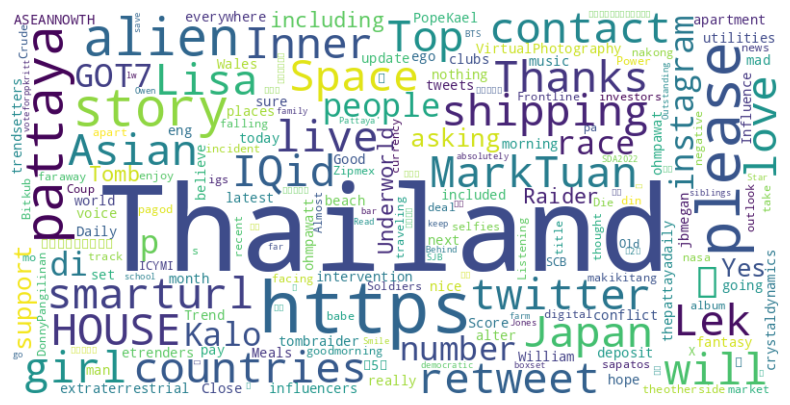

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
content_data = tweet_data['content']
all_text = " ".join(content_data)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Note: ไม่ต้องรายงานส่วนนี้ในสไลด์

## Problem 2 Study Trip Advisor Hotel Reviews Sentiment

We are working with the Trip Advisor Hotel Reviews dataset. You can see the source from https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews.

* Analyze the data to find out what make a hotel good or bad
<br>You may create a tag of "positive", "negative", or "neural" sentiment first. After tagging each tweet with different sentiment, we can separate positive tweets and negative tweets. Then, it is easier to find our common patterns in positive tweets or good hotels, and vice versa.

In [10]:
from google.colab import drive
drive.mount('/content/drive')
import string

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
pd.read_csv('/content/drive/MyDrive/Data warehouse/tripadvisor_hotel_reviews - tripadvisor_hotel_reviews.csv')

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [12]:
#----------------------------------------------
# Your code starts here
# label each tweet as positive, negative, and neural sentiment
# combine tweet texts in each type
# tokenize texts
# convert to lower case
# remove stop words
# remove any other stop words, like RT
# remove punctuations
# remove other symbols?
# analyze word frequency in each sentiment type and so on
# create some data visualization for the analysis and your presentation





label each tweet as positive, negative, and neural sentiment

In [13]:
 # label each tweet as positive, negative, and neural sentiment
import pandas as pd

# Read the CSV file
reviews = pd.read_csv('/content/drive/MyDrive/Data warehouse/tripadvisor_hotel_reviews - tripadvisor_hotel_reviews.csv')

positive_reviews = reviews[reviews['Rating']>3]
neural_reviews = reviews[reviews['Rating']==3]
negative_reviews = reviews[reviews['Rating']<3]
positive_reviews['sentiment'] = 'positive'
positive_reviews['num'] = range(len(positive_reviews))
neural_reviews['sentiment'] = 'neural'
neural_reviews['num'] = range(len(neural_reviews))
negative_reviews['sentiment'] = 'negative'
negative_reviews['num'] = range(len(negative_reviews))
datacon = pd.concat([positive_reviews,neural_reviews,negative_reviews])


<ipython-input-13-79f2a9a8d9be>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['sentiment'] = 'positive'
<ipython-input-13-79f2a9a8d9be>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['num'] = range(len(positive_reviews))
<ipython-input-13-79f2a9a8d9be>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

combine tweet texts in each type

In [14]:
# Combine text from positive, neutral, and negative reviews
#สร้าง string 3 รายการโดยใช้การ join
positive_reviews_combine = " ".join(positive_reviews['Review'])
neural_reviews_combine = " ".join(neural_reviews['Review'])
negative_reviews_combine = " ".join(negative_reviews['Review'])


convert to lower case

In [16]:
# convert to lower case
#แปลงให้เป็นตัวพิมพ์เล็ก
# Create a dictionary to store the lowercase versions of the combined reviews
lowercase_reviews = {}

# Iterate through each sentiment category
for sentiment, combined_text in zip(['positive', 'neutral', 'negative'], [positive_reviews_combine, neural_reviews_combine, negative_reviews_combine]):
    lowercase_reviews[sentiment] = combined_text.lower()

# Access the lowercase text for each sentiment category
P_lower = lowercase_reviews['positive']
NR_lower = lowercase_reviews['neutral']
NG_lower = lowercase_reviews['negative']



remove stop words

In [39]:
# remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
our_stopwords = set(STOPWORDS)
    # Remove stopwords and join tokens back into text
clean_P_text = ' '.join([word for word in P_lower.split() if word not in (our_stopwords)])
clean_NR_text = ' '.join([word for word in NR_lower.split() if word not in (our_stopwords)])
clean_NG_text = ' '.join([word for word in NG_lower.split() if word not in (our_stopwords)])
clean_P_tokens = [t for t in clean_P_text.split()]
clean_NR_tokens = [t for t in clean_NR_text.split()]
clean_NG_tokens = [t for t in clean_NG_text.split()]
print(len(our_stopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


192


remove any other stop words, like RT

In [40]:
# remove any other stop words, like RT
from nltk.corpus import stopwords

# Define your custom stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['anyone', 'runnnnnnn', 'much/', 'mary/'])

# Clean and tokenize positive,neutral and negative reviews
N_clean_P_text = ' '.join([word for word in P_lower.split() if word not in (custom_stopwords)])
N_clean_NR_text = ' '.join([word for word in NR_lower.split() if word not in (custom_stopwords)])
N_clean_NG_text = ' '.join([word for word in NG_lower.split() if word not in (custom_stopwords)])
N_clean_P_tokens = [t for t in N_clean_P_text.split()]
N_clean_NR_tokens = [t for t in N_clean_NR_text.split()]
N_clean_NG_tokens = [t for t in N_clean_NG_text.split()]

# Print the length of the custom stopwords set
print(len(custom_stopwords))


196


remove punctuations

In [42]:
# remove punctuations
R_punctuations_my_stopwords = set(STOPWORDS)
R_punctuations_my_stopwords.update(['anyone','runnnnnnn','much','mary'])
P_text_R_punctuations = P_lower.translate(str.maketrans('', '', string.punctuation))
NR_text_R_punctuations = NR_lower.translate(str.maketrans('', '', string.punctuation))
NG_text_R_punctuations = NG_lower.translate(str.maketrans('', '', string.punctuation))

N2_clean_P_text = ' '.join([word for word in P_text_R_punctuations.split() if word not in (R_punctuations_my_stopwords)])
N2_clean_NR_text = ' '.join([word for word in NR_text_R_punctuations.split() if word not in (R_punctuations_my_stopwords)])
N2_clean_NG_text = ' '.join([word for word in NG_text_R_punctuations.split() if word not in (R_punctuations_my_stopwords)])

N2_clean_P_tokens = [t for t in N2_clean_P_text.split()]
N2_clean_NR_tokens = [t for t in N2_clean_NR_text.split()]
N2_clean_NG_tokens = [t for t in N2_clean_NG_text.split()]

remove other symbols?

In [47]:
P_text_removesymbols = P_text_R_punctuations.translate(str.maketrans('', '', '^çéîæù©äèâ¾ü:14ãö«êàë´£±ûå¢µ'))
NR_text_removesymbols = NR_text_R_punctuations.translate(str.maketrans('', '', '^çéîæù©äèâ¾ü:14ãö«êàë´£±ûå¢µ'))
NG_text_removesymbols = NG_text_R_punctuations.translate(str.maketrans('', '', '^çéîæù©äèâ¾ü:14ãö«êàë´£±ûå¢µ'))

N3_clean_P_text = ' '.join([word for word in P_text_removesymbols.split() if word not in (R_punctuations_my_stopwords)])
N3_clean_NR_text = ' '.join([word for word in NR_text_removesymbols.split() if word not in (R_punctuations_my_stopwords)])
N3_clean_NG_text = ' '.join([word for word in NG_text_removesymbols.split() if word not in (R_punctuations_my_stopwords)])

N3_clean_P_tokens = [t for t in N3_clean_P_text.split()]
N3_clean_NR_tokens = [t for t in N3_clean_NR_text.split()]
N3_clean_NG_tokens = [t for t in N3_clean_NG_text.split()]

lemmatization

In [44]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import nltk
nltk.download('wordnet')

wordlem = WordNetLemmatizer()

def lemmaSentence(sentence):
    token_words = word_tokenize(sentence)
    lemma_sentence = []
    for word in token_words:
        lemma_sentence.append(wordlem.lemmatize(word))  # Use wordlem consistently
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

# Example usage:
lem_N_clean_P_text = lemmaSentence(N_clean_P_text)
lem_N_clean_NR_text = lemmaSentence(N_clean_NR_text)
lem_N_clean_NG_text = lemmaSentence(N_clean_NG_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


tokenize texts

In [45]:
# tokenize texts
#แยกสตริงบทวิจารณ์รวมออกเป็นรายการโทเค็นแต่ละรายการ
# Tokenize the combined text from positive, neutral, and negative reviews
P_tokens = positive_reviews_combine.split()
NR_tokens = neural_reviews_combine.split()
NG_tokens = negative_reviews_combine.split()
lem_P_tokens = [lemmaSentence(N_clean_P_text).split()]
lem_NR_tokens = [t for t in lem_N_clean_NR_text.split()]
lem_NG_tokens = [t for t in lem_N_clean_NG_text.split()]

analyze word frequency in each sentiment type and so on

 
Positive Reviews
 


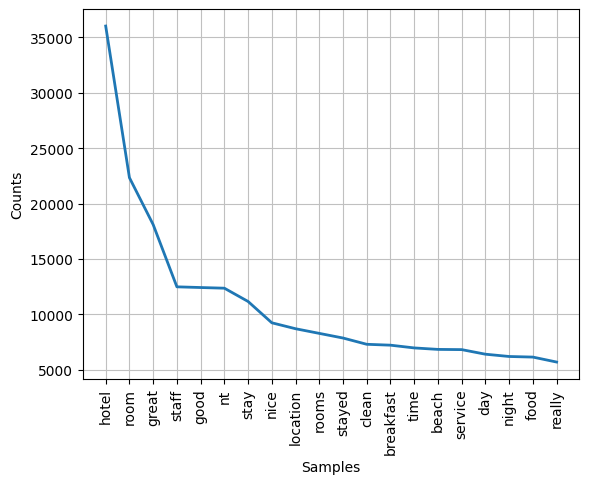

 
 
Neutral Reviews
 


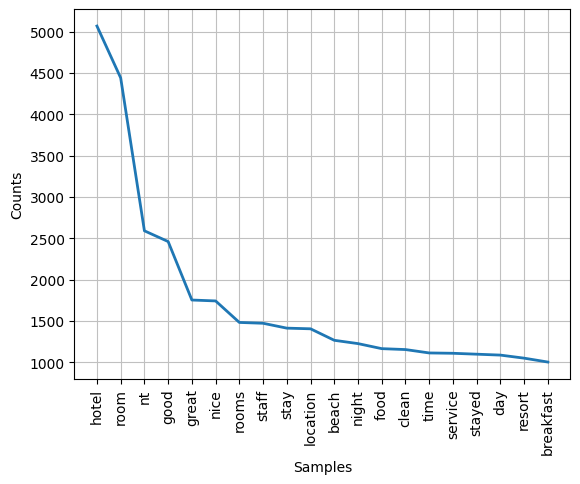

 
 
Negative Reviews
 


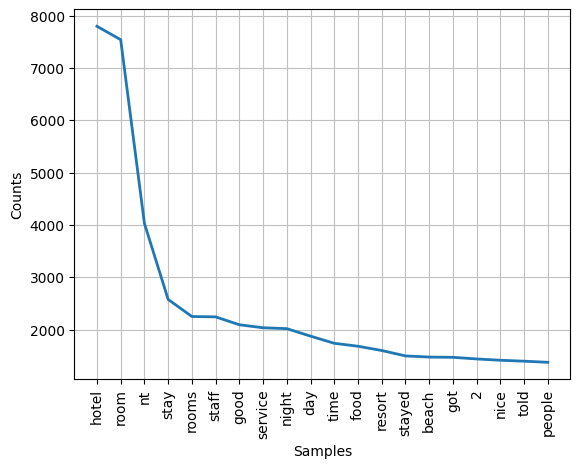

In [48]:
# analyze word frequency in each sentiment type and so on
import nltk
freq_P = nltk.FreqDist(N3_clean_P_tokens)
freq_NR = nltk.FreqDist(N3_clean_NR_tokens)
freq_NG = nltk.FreqDist(N3_clean_NG_tokens)

def plot_frequency_distribution(tokens, title):
    freq = nltk.FreqDist(tokens)
    print(" ")
    print(title)
    print(" ")
    freq.plot(20, cumulative=False)
    print(" ")

plot_frequency_distribution(N3_clean_P_tokens, "Positive Reviews")
plot_frequency_distribution(N3_clean_NR_tokens, "Neutral Reviews")
plot_frequency_distribution(N3_clean_NG_tokens, "Negative Reviews")


data visualization for the analysis

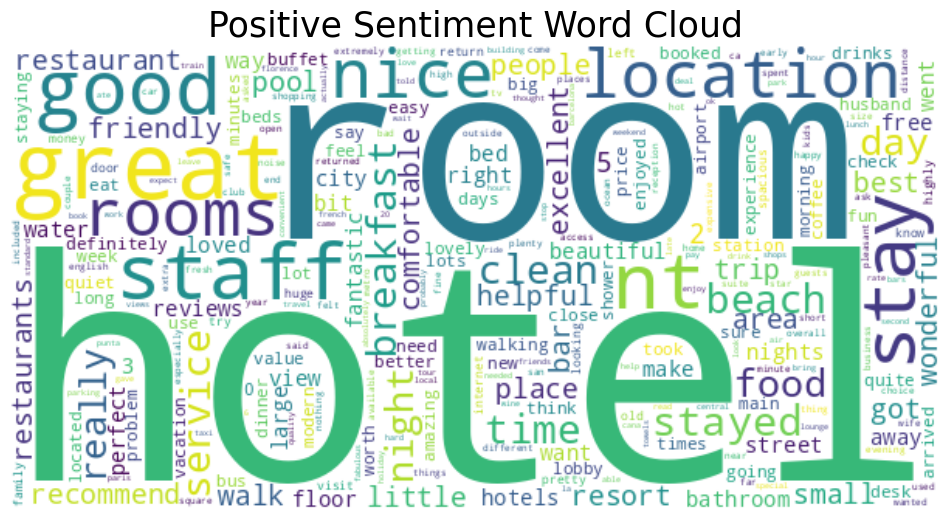

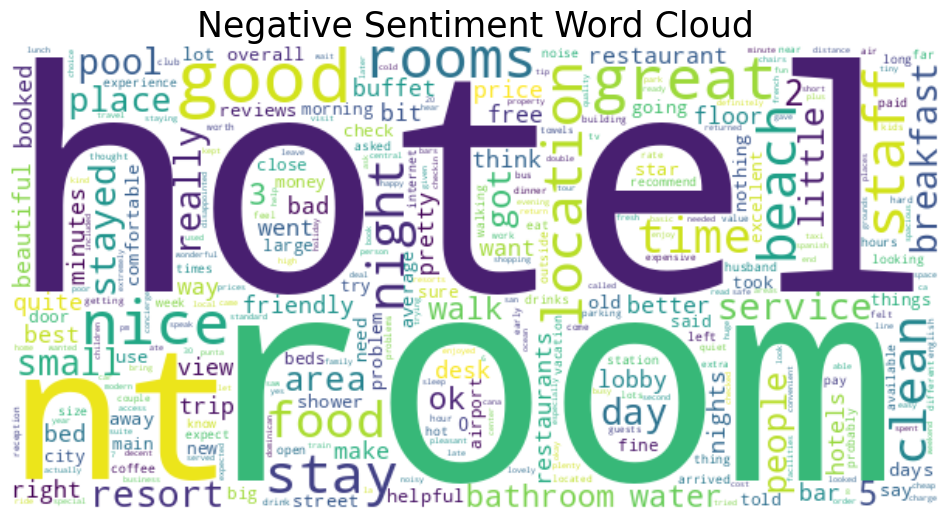

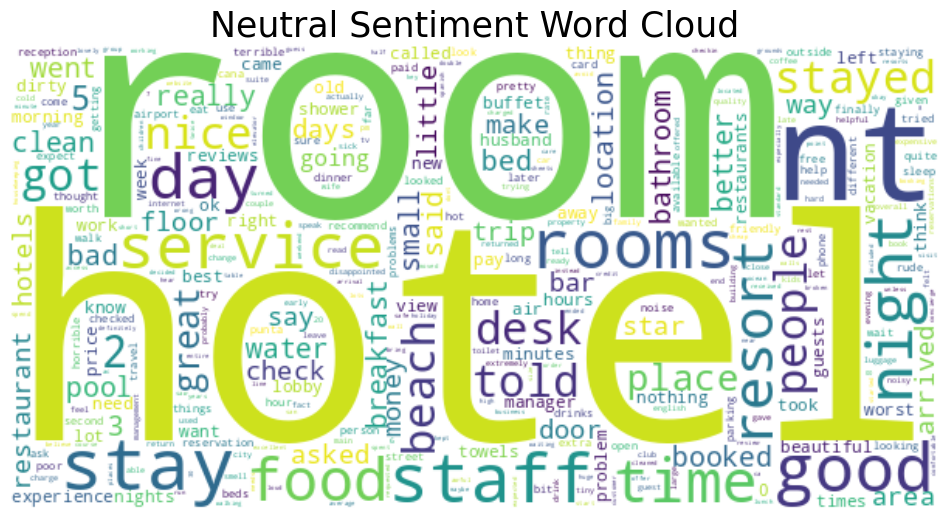

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_and_display_wordcloud(freq_dist, title):
    # Create a WordCloud object
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=400,
        max_font_size=300,
        width=600,
        height=300,
    ).generate_from_frequencies(freq_dist)

    # Display the WordCloud
    plt.figure(figsize=(12, 14))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=25)
    plt.axis('off')
    plt.show()

generate_and_display_wordcloud(freq_P, 'Positive Sentiment Word Cloud')
generate_and_display_wordcloud(freq_NR, 'Negative Sentiment Word Cloud')
generate_and_display_wordcloud(freq_NG, 'Neutral Sentiment Word Cloud')

#####Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small


##create some data visualization for the analysis and your presentation(user by pander)

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px

wordcloud = WordCloud(
    background_color='white',
    stopwords=custom_stopwords,
    max_words=300,
    max_font_size=200,
    width=1000, height=800,
    random_state=42,
).generate(" ".join(reviews['Review'].astype(str)))

    # Create a figure and display the word cloud
    fig = plt.figure(figsize=(12, 14))
    plt.imshow(wordcloud)
    plt.title("WORD CLOUD - REVIEW", fontsize=25)
    plt.axis('off')
    plt.show()


IndentationError: ignored

In [ ]:
import plotly.express as px

# Create a histogram using Plotly Express
fig = px.histogram(
    data_frame=reviews,
    x='Rating',
    labels={'Rating': 'Rating', 'count': 'Frequency', 'color': 'Rating'},
    color='Rating'
)

# Customize the layout of the histogram
fig.update_layout(
    bargap=0.2,  # Adjust the gap between bars
    title='Distribution of Ratings',  # Set the title
    title_x=0.5,  # Center the title
    title_font=dict(size=20),  # Customize the title font
)

# Customize the appearance of the bars
fig.update_traces(
    marker=dict(line=dict(color='#000000', width=2))
)

# Show the histogram
fig.show()


In [ ]:
import plotly.express as px

# Count the occurrence of each word in the reviews
most_used_words = reviews['Review'].str.split(expand=True).stack().value_counts()

# Select the top 200 most frequent words
most_used_words_top_200 = most_used_words[:200]

# Create a treemap using Plotly Express
fig = px.treemap(
    most_used_words_top_200,
    path=[most_used_words_top_200.index],
    values=0
)

# Customize the layout of the treemap
fig.update_layout(
    title='The 200 Most Frequent Words',
    title_x=0.5,  # Center the title
    title_font=dict(size=20),  # Customize the title font
)

# Display both the labels and values in the treemap
fig.update_traces(textinfo="label+value")

# Show the treemap
fig.show()


In [ ]:
COT = [(positive_reviews['sentiment'].count()),(neural_reviews['sentiment'].count()),(negative_reviews['sentiment'].count())]
COT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mylabels = ['positive reviews', 'neutral reviews', 'negative reviews']
y = np.array(COT)
plt.pie(y, labels=mylabels, autopct='%1.1f%%')
plt.title("Pie Chart - Sentiment", fontsize=25)
plt.show()


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Display the top 5 words and their frequencies for positive sentiment
stop_words = list(freq_P.items())[:5]
stop_words_df = pd.DataFrame(sorted(stop_words, key=lambda x: x[1], reverse=True), columns=['Word', 'Count'])

# Extract the word and count columns
words = stop_words_df['Word']
counts = stop_words_df['Count']

# Create a bar plot for the top 5 words
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='#CC66FF', width=0.4)
plt.xlabel("Words of Positive Sentiment")
plt.ylabel("Count")
plt.title("Top 5 Words of Positive Sentiment")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Ensure labels fit within the figure
plt.savefig("word_frequency_positive.png")  # Save the plot as an image
plt.show()


In [ ]:
import pandas as pd
p_rev = pd.read_csv('/content/drive/MyDrive/Data warehouse/tripadvisor_hotel_reviews - tripadvisor_hotel_reviews.csv')

import matplotlib.pyplot as plt
import pandas as pd

def analyze_word_frequency(sentiment_type, data, top_n=10):
    freq = {}
    for i in data['text_lemmatized']:
        for j in i:
            if j not in freq:
                freq[j] = 1
            else:
                freq[j] += 1

    freq_df = pd.DataFrame(sorted(freq.items(), key=lambda x: x[1], reverse=True))

    f1 = freq_df[0][:top_n]
    f2 = freq_df[1][:top_n]

    plt.figure(figsize=(16, 4))
    plt.bar(f1, f2, color='#F72626', width=0.4)
    plt.xlabel(f"Words in the {sentiment_type}")
    plt.ylabel("Count")
    plt.title(f"Top {top_n} words in the {sentiment_type}")
    plt.savefig(f"wordfrequency_{sentiment_type.lower()}.png")
    plt.show()

# Assuming you have dataframes p_rev, nr_rev, and ng_rev for positive, neutral, and negative sentiments respectively
analyze_word_frequency("Positive", p_rev, top_n=10)
analyze_word_frequency("Neutral", nr_rev, top_n=10)
analyze_word_frequency("Negative", ng_rev, top_n=10)



# Report


##How did you analyze the data?
วิเคราะห์ข้อมูลโดยการนำข้อมูลมาเเยกประเภท โดยแบ่งได้เป็ยข้อมูลเชิงบวก เชิงลบ และเป็นกลาง จากนั้นนำข้อมูลที่ได้มาแยกเป็น 3 ตาราง
- ทำการปรับรูปของ review ให้อยู่ในรูปแบบของตัวพิมพ์เล็ก
- กลบเครื่องหมายวรรคตอน
- ลบ Stopword ออก
- ปรับข้อมูลให้เเยกเป็นคำด้วยโทเค็น
- ปรับคำที่มีความหมายเดียวกันให้อยู่ในรูปเดียวกันด้วย lemmatizer

##What did you find in the data? (please include figures or tables in the report, but no source code)
จากการวิเคราะห์ข้อมูลพบว่า review ทั้งหมดมี
- ความคิดเห็นที่เป็นเชิงบวก 73.7%
- ความคิดเห็นที่เป็นลบ  15.7%
- ความคิดเห็นที่เป็นกลาง 10.7%

3 คำที่พบบ่อยมากสุด
- ความคิดเห็นที่เป็นเชิงบวก "stay great not"
- ความคิดเห็นที่เป็นลบ "room not hotel"
- ความคิดเห็นที่เป็นกลาง "room hotel not"


## Problem 3 Collect and Analyze Your Interesting Topic

* Select a topic that your group members are interested
* Gather url from at least 3 webpages
* Use urllib.request to retrieve data from webpage
* Clean and find intersting patterns and information
* Create a word cloud of your topic

#Topic "Chocolate"

In [ ]:
#----------------------------------------------
# Your code starts here
!pip install nltk
import nltk
import urllib.request

# Grab a webpage from https://newsinhealth.nih.gov/2021/02/chocolate-health-claims
# Grab a webpage from https://www.medicalnewstoday.com/articles/270272
# Grab a webpage from https://www.healthline.com/nutrition/7-health-benefits-dark-chocolate
Chocolate_Health_Claims =  urllib.request.urlopen('https://newsinhealth.nih.gov/2021/02/chocolate-health-claims')
Risks_of_chocolate =  urllib.request.urlopen('https://www.medicalnewstoday.com/articles/270272')
Benefits_Dark_Chocolate =  urllib.request.urlopen('https://www.healthline.com/nutrition/7-health-benefits-dark-chocolate')

html_CHC = Chocolate_Health_Claims.read()
html_ROC = Risks_of_chocolate.read()
html_BDC = Benefits_Dark_Chocolate.read()

In [ ]:
type(html_CHC)
type(html_ROC)
type(html_BDC)

In [ ]:
#html_CHC
#html_ROC
#html_BDC

In [ ]:
from bs4 import BeautifulSoup
soup_html_CHC = BeautifulSoup(html_CHC,'html5lib')
text_CHC = soup_html_CHC.get_text(strip = True)

from bs4 import BeautifulSoup
soup_html_ROC = BeautifulSoup(html_ROC,'html5lib')
text_ROC = soup_html_ROC.get_text(strip = True)

from bs4 import BeautifulSoup
soup_html_BDC = BeautifulSoup(html_BDC,'html5lib')
text_BDC = soup_html_BDC.get_text(strip = True)

# Tokenize texts

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
print(stop_words)

# tokenize texts
tokens_CHC = [t for t in text_CHC.split()]
tokens_ROC = [t for t in text_ROC.split()]
tokens_BDC = [t for t in text_BDC.split()]

# convert to lower case
lower_CHC = text_CHC.lower()
lower_ROC = text_ROC.lower()
lower_BOC = text_BDC.lower()

## Custom stop words

In [ ]:
from nltk.corpus import stopwords
# Custom stop words
stop_words_CHC = stopwords.words('english')
stop_words_ROC = stopwords.words('english')
stop_words_BDC = stopwords.words('english')
print(len(stop_words_CHC))

# add multiple words
stop_words_CHC.extend(['may', 'the','also',']'])
stop_words_ROC.extend(['may', 'the','also',']'])
stop_words_BDC.extend(['may', 'the','also',']'])
print(len(stop_words_CHC))


##Remove StopWord

In [ ]:
# remove stop words
clean_text_CHC = ' '.join([word for word in lower_CHC.split() if word not in (stop_words)])
clean_text_ROC = ' '.join([word for word in lower_ROC.split() if word not in (stop_words)])
clean_text_BDC = ' '.join([word for word in lower_BOC.split() if word not in (stop_words)])
clean_tokens_CHC = [t for t in clean_text_CHC.split()]
clean_tokens_ROC = [t for t in clean_text_ROC.split()]
clean_tokens_BDC = [t for t in clean_text_BDC.split()]

In [ ]:
stop_words_CHC.extend(['may', 'the','also',']'])
stop_words_ROC.extend(['may', 'the','also',']'])
stop_words_BDC.extend(['may', 'the','also',']'])
print(len(stop_words_CHC))

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
sr = stopwords.words('english')

In [ ]:
tokens = word_tokenize(text)

In [ ]:
clean_tokens = tokens_BDC[:]
# remove stop words
for token in tokens_BDC:
    if token in stopwords.words('english'):
        clean_tokens_BDC.remove (token)

In [ ]:
# นำเข้า stopwords และตัดคำ
stop_words = set(stopwords.words('english'))

# กำหนดฟังก์ชันสำหรับตัดคำและลบ stopwords
def clean_and_tokenize(text):
    # ตัดคำ
    tokens = word_tokenize(text)

    # ลบ stopwords
    clean_tokens = [word for word in tokens if word.lower() not in stop_words]

    return clean_tokens

# ใช้ฟังก์ชันสำหรับทำความสะอาดและตัดคำ
clean_CHC_tokens = clean_and_tokenize(html_CHC)
clean_ROC_tokens = clean_and_tokenize(html_ROV)
clean_BDC_tokens = clean_and_tokenize(html_BDC)

##Count Word Frequency

In [ ]:
from nltk.corpus import stopwords
sr = stopwords.words('english')
clean_tokens = tokens[:]
# remove stop words
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

In [ ]:
sr

In [ ]:
sr + ["a"]

In [ ]:
# Count word frequency
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

In [ ]:
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

In [ ]:
freq.plot(20, cumulative=False)

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
# create an object of class PorterStemmer
ps = PorterStemmer()
ls = LancasterStemmer()

In [ ]:
# importing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# Input text - to summarize
text = """Chocolate or cocoa is a food made from roasted and ground cacao seed kernels that is available as a liquid, solid, or paste, either on its own or as a flavoring agent in other foods. Cacao has been consumed in some form since at least the Olmec civilization (19th–11th century BCE),[1][2] and the majority of Mesoamerican people, including the Maya and Aztecs, made chocolate beverages.[3]"""

print(text)

In [ ]:
# Creating a frequency table to keep the
# score of each word
freqTable = dict()
for word in words:
    word = word.lower()
    if word in stopWords:
        continue
    if word in freqTable:
        freqTable[word] += 1
    else:
        freqTable[word] = 1
freqTable

In [ ]:
sentences = sent_tokenize(text)
sentences

In [ ]:
# Creating a dictionary to keep the score
# of each sentence
sentenceValue = dict()

for sentence in sentences:
    for word, freq in freqTable.items():
        if word in sentence.lower():
            if sentence in sentenceValue:
                sentenceValue[sentence] += freq
            else:
                sentenceValue[sentence] = freq

sentenceValue

In [ ]:
sumValues = 0
for sentence in sentenceValue:
    sumValues += sentenceValue[sentence]

# Average value of a sentence from the original text
average = int(sumValues / len(sentenceValue))
average

In [ ]:
# Storing sentences into our summary.
summary = ''
for sentence in sentences:
    if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)):
        summary += " " + sentence
print(summary)

In [ ]:
# importing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# Input text - to summarize
text = """ """

# Tokenizing the text
stopWords = set(stopwords.words("english"))
words = word_tokenize(text)

# Creating a frequency table to keep the
# score of each word

freqTable = dict()
for word in words:
    word = word.lower()
    if word in stopWords:
        continue
    if word in freqTable:
        freqTable[word] += 1
    else:
        freqTable[word] = 1

# Creating a dictionary to keep the score
# of each sentence
sentences = sent_tokenize(text)
sentenceValue = dict()

for sentence in sentences:
    for word, freq in freqTable.items():
        if word in sentence.lower():
            if sentence in sentenceValue:
                sentenceValue[sentence] += freq
            else:
                sentenceValue[sentence] = freq



sumValues = 0
for sentence in sentenceValue:
    sumValues += sentenceValue[sentence]

# Average value of a sentence from the original text

average = int(sumValues / len(sentenceValue))

# Storing sentences into our summary.
summary = ''
for sentence in sentences:
    if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)):
        summary += " " + sentence
print(summary)

### Report
* What did you find out about your topic? (please include figures or tables in the report, but no source code)

# ☃️ The End of Project 1 ☃️